In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
df = pd.read_excel("cf.xlsx", sheet_name = "17FacStaff", dtype={'ZIP': str, 'FAC STAFF': str}) 

In [3]:
df.head()

,ZIP,FAC STAFF,Distance
0,02453,FAC,377.0
1,08035,FAC,83.4
2,13905,FAC,261.0
3,16648,FAC,234.0
4,19145,FAC,79.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 3 columns):
ZIP          560 non-null object
FAC STAFF    560 non-null object
Distance     556 non-null float64
dtypes: float64(1), object(2)
memory usage: 13.2+ KB


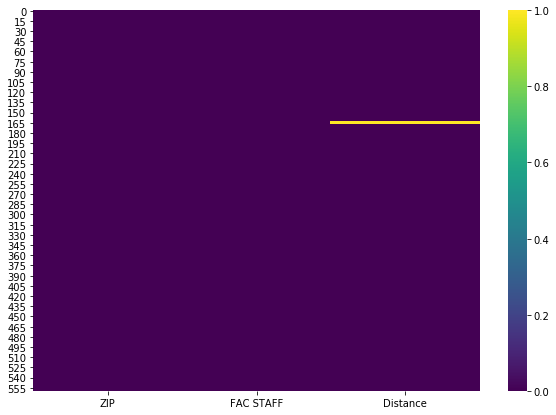

In [5]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cmap = 'viridis')

In [6]:
values = {'ZIP': 21620, 'FAC STAFF': np.nan, 'Distance':3}
df.fillna(values, inplace = True) 

In [7]:
df.ZIP = df.ZIP.astype(str) 

In [8]:
df['zips'] = df['ZIP'].str.split('-').str.get(0) 
df.drop(['ZIP'], axis = 1, inplace = True) 

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 3 columns):
FAC STAFF    560 non-null object
Distance     560 non-null float64
zips         560 non-null object
dtypes: float64(1), object(2)
memory usage: 13.2+ KB


In [10]:
df.loc[df['Distance'] > 150, 'Distance'] = 3 

#### Faculty footprint

In [11]:
df2 = df[df['FAC STAFF'] == "FAC"]['Distance']

In [12]:
df2.count() 

168

In [13]:
(df2*2*(70+90)).sum()

1382912.0

In [14]:
(df2).sum()/168

25.723809523809525

#### Staff footprint

In [15]:
df3 = df[df['FAC STAFF'] == "STAFF"]['Distance']
df3.count() 

392

In [16]:
(df3*2*(70+90+(72-20))).sum()

3043853.5999999996

In [17]:
(df3).sum()/392

18.313520408163264